## From this notebook, we are going to build classification models.

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')
df.dropna(subset=['price'], inplace=True)

In [3]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].copy() # copy here to get rid of the copy warning
test_raw = df[df.year >= 2015].copy()

# 1. Generate Targets

<font color='red'>Assignment:</font> We define a categorical target **luxury**. If **price** is higher than 500k dollars, we say this item is a **luxury**, and use integer 1 to mark it as positive. Otherwise, we use 0 to mark it as negative. Get the target Series for training and testing data sets (**y_train** and **y_test**), respectively.

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
# train_raw['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))

In [ ]:
# test_raw['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))

In [ ]:
# train_raw['luxury'] = ''
# test_raw['luxury'] = ''

In [ ]:
# train_raw['luxury'].values[:] = 0
# test_raw['luxury'].values[:] = 0

In [ ]:
# train_raw['luxury'][train_raw[train_raw.price > 500000].index] = 1
# test_raw['luxury'][test_raw[test_raw.price > 500000].index] = 1

In [4]:
train_raw["luxury"] = train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
test_raw["luxury"] = test_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)

In [5]:
y_train = train_raw.luxury

In [6]:
y_test = test_raw.luxury

<font color='red'>Assignment:</font> Visualize the comparison between the numbers of positive and negative data points. **Hint:** You could use either bar chart or pie chart.

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

<BarContainer object of 2 artists>

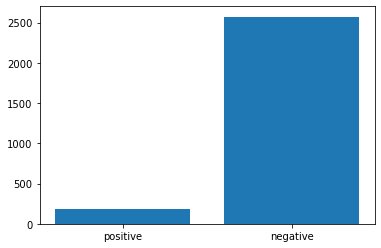

In [8]:
plt.bar(['positive', 'negative'], [train_raw['luxury'].sum(), train_raw.shape[0]-train_raw['luxury'].sum()])

#### <font color='red'>Note:</font> you can use any modules/functions to plot.

<font color='red'>Question:</font> What is the definition of base rate?

### Base rate, refers to the probabilities unconditioned on featural evidence. In Bayes' theorem, it is also referred to as Prior probability. 

<font color='red'>Question:</font> What is the base rate in this case?

In [9]:
train_raw['luxury'].sum()/train_raw.shape[0]

0.06673920928545521

In [10]:
# using value_counts
train_raw['luxury'].value_counts(normalize=True)

0    0.933261
1    0.066739
Name: luxury, dtype: float64

#### <font color='red'>Note:</font> always check for train. How about test?

# 2. Simplest Models

## 2.1 All Negative Model

### 2.1.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 0.

In [11]:
from sklearn.dummy import DummyClassifier

In [12]:
dummyc = DummyClassifier(strategy = 'constant', constant = 0)

In [13]:
dummyc.fit(train_raw.price, y_train)

DummyClassifier(constant=0, strategy='constant')

#### <font color='red'>Note:</font> build your own class.

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [14]:
y_train_pred = dummyc.predict(train_raw.price)
y_test_pred = dummyc.predict(test_raw.price)

In [15]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 2.1.2 Accuracy

<font color='red'>Assignment:</font> Calculate the training and testing **accuracy_score**s.

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.9332607907145448

In [19]:
accuracy_score(y_test, y_test_pred)

0.8927738927738927

<font color='red'>Question:</font> How is accuracy score calculated?

### The score computes subset accuracy. It gives the same result as the score function in the DummyClassifier.

<font color='red'>Question:</font> Are the accuracy scores good? Why is that? Is the model useful?

### Although the score seems high, it is not useful. If we think about how many true 0s we have, we will realize that setting everything to zero will give you a quite 'nice' prediction...

<font color='red'>Question:</font> How is accuracy score related to base rate?

### <font color = 'blue'> It is 1 - base rate </font>

### 2.1.2 Precision

<font color='red'>Assignment:</font> Calculate the training and testing **precision_score**s.

In [20]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred, average='macro')

C:\Users\zhuy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4666303953572724

In [21]:
precision_score(y_test, y_test_pred, average='macro')

C:\Users\zhuy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.44638694638694637

<font color='red'>Question:</font> How is **precision_score** calculated?

### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

<font color='red'>Question:</font> If the **precision_score** for a model is 80%, what does it mean?

### It means for all my positive predictions, there are 80% actually positive.

### 2.1.3 Recall

<font color='red'>Assignment:</font> Calculate the training and testing **recall_score**s.

In [22]:
from sklearn.metrics import recall_score

recall_score(y_train, y_train_pred, average='macro')

0.5

In [23]:
recall_score(y_test, y_test_pred, average='macro')

0.5

<font color='red'>Question:</font> How is **recall_score** calculated?

### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<font color='red'>Question:</font> If the **recall_score** for a model is 80%, what does it mean?

### Over all the real positives, I correctly identified 80% of them.

### 2.1.4 F1 Score

<font color='red'>Assignment:</font> Calculate the training and testing **f1_score**s.

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='macro')

0.48273921200750475

In [25]:
f1_score(y_test, y_test_pred, average='macro')

0.47167487684729065

<font color='red'>Question:</font> How is **f1_score** calculated?

### The F1 score can be interpreted as a weighted average of the precision and recall. F1 = 2 * (precision * recall) / (precision + recall)
![image.png](attachment:image.png)

<font color='red'>Question:</font> Why do we need **f1_score**?

### F1 Score is needed when you want to seek a balance between Precision and Recall if there is an uneven distribution (large number of Actual Negatives).

### 2.1.5 Classification Report

<font color='red'>Assignment:</font> Use **classification_report** to get systematic idea about model performance.

In [26]:
recall_score(y_train, y_train_pred, average='micro')

0.9332607907145448

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2573
           1       0.00      0.00      0.00       184

    accuracy                           0.93      2757
   macro avg       0.47      0.50      0.48      2757
weighted avg       0.87      0.93      0.90      2757



C:\Users\zhuy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhuy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zhuy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

### <font color = 'blue'> Can we discuss the relation between model performance and these scores? </font>

### 2.1.6 Confusion Matrix

<font color='red'>Assignment:</font> Get the **confusion_matrix** of the model.

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[2573,    0],
       [ 184,    0]], dtype=int64)

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[383,   0],
       [ 46,   0]], dtype=int64)

<font color='red'>Question:</font> What does every element in the confusion matrix represent, respectively?

### Top left element is true negative, top right is false positive, left bottom is false negative and right bottom is true positive.

<font color='red'>Question:</font> How can you calculate recall and precision with a confusion matrix?

### You can find the tp, fp and fn from the confusion matrix.
<br>Recall: tp / (tp + fn)
<br>Precision: tp / (tp + fp)

## 2.2 All Positive Model

### 2.2.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 1.

In [ ]:
dummyc = DummyClassifier(strategy = 'constant', constant = 1)
dummyc.fit(train_raw.price, y_train)

DummyClassifier(constant=1, strategy='constant')

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [ ]:
y_train_pred = dummyc.predict(train_raw.price)
y_test_pred = dummyc.predict(test_raw.price)

### 2.2.2 Scores and confusion matrices

<font color='red'>Assignment:</font> Calculate the scores and confusion matrices of this model.

In [ ]:
accuracy_score(y_train, y_train_pred)

0.06673920928545521

In [ ]:
accuracy_score(y_test, y_test_pred)

0.10722610722610723

In [ ]:
precision_score(y_train, y_train_pred, average='macro')

0.033369604642727604

In [ ]:
precision_score(y_test, y_test_pred, average='macro')

0.053613053613053616

In [ ]:
recall_score(y_train, y_train_pred, average='macro')

0.5

In [ ]:
recall_score(y_test, y_test_pred, average='macro')

0.5

In [ ]:
f1_score(y_train, y_train_pred, average='macro')

0.06256375382522951

In [ ]:
f1_score(y_test, y_test_pred, average='macro')

0.09684210526315791

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[   0, 2573],
       [   0,  184]], dtype=int64)

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[  0, 383],
       [  0,  46]], dtype=int64)

In [ ]:
recall_score(y_train, y_train_pred, pos_label=1, average='weighted')

0.06673920928545521

In [ ]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2573
           1       0.07      1.00      0.13       184

    accuracy                           0.07      2757
   macro avg       0.03      0.50      0.06      2757
weighted avg       0.00      0.07      0.01      2757



In [ ]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.11      1.00      0.19        46

    accuracy                           0.11       429
   macro avg       0.05      0.50      0.10       429
weighted avg       0.01      0.11      0.02       429



<font color='red'>Question:</font> What are the difference between all-positive and all-negative models?

### Because most of the data in this model are 0s, for the all-negative model, accuracy, precision and f1 are all high while they are all low for all-positive model. However, the recall stays the same for both models.